In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00


# **Exercise 1: Setting up the Enviroment**

**Import libraries:**

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# **Exercise 2: Building a simple bayesian network**

**1. Define the structure:**

In [ ]:
model = BayesianModel([('weather', 'traffic'), ('traffic', 'late')])

**2. Define Conditional Probability Tables (CPTs):**

In [ ]:
cpd_weather = TabularCPD(variable='weather', variable_card=2, values=[[0.8], [0.2]])

cpd_traffic = TabularCPD(variable='traffic', variable_card=2,
                         values=[[0.9, 0.5], [0.1, 0.5]],
                         evidence=['weather'], evidence_card=[2])

cpd_late = TabularCPD(variable='late', variable_card=2,
                      values=[[0.95, 0.4], [0.05, 0.6]],
                      evidence=['traffic'], evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

# **Exercise 3: Querying the Bayesian Network**

**1. Perform Exact Inference:**

In [ ]:
inference = VariableElimination(model)

result = inference.query(variables=['late'], evidence={'weather': 1})
print(result)

+---------+-------------+
| late    |   phi(late) |
+=========+=============+
| late(0) |      0.6750 |
+---------+-------------+
| late(1) |      0.3250 |
+---------+-------------+


# **Exercise 4: Parameter Learning**

**1. Simulate a Dataset:**

In [ ]:
data = pd.DataFrame({
    'weather': np.random.choice([0, 1], size=1000, p=[0.8, 0.2]),
    'traffic': np.nan,
    'late': np.nan
})

data.loc[data['weather'] == 0, 'traffic'] = np.random.choice(
    [0, 1],
    size=data[data['weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['weather'] == 1, 'traffic'] = np.random.choice(
    [0, 1],
    size=data[data['weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['late'] = np.where(
    data['traffic'] == 0,
    np.random.choice([0, 1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0, 1], size=data.shape[0], p=[0.4, 0.6])
)

**2. Estimate the Parameters:**

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('weather', 'traffic'), ('traffic', 'late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)
    print("\n")

+------------+-------+
| weather(0) | 0.811 |
+------------+-------+
| weather(1) | 0.189 |
+------------+-------+


+--------------+---------------------+--------------------+
| weather      | weather(0)          | weather(1)         |
+--------------+---------------------+--------------------+
| traffic(0.0) | 0.9075215782983971  | 0.5291005291005291 |
+--------------+---------------------+--------------------+
| traffic(1.0) | 0.09247842170160296 | 0.4708994708994709 |
+--------------+---------------------+--------------------+


+---------+---------------------+--------------------+
| traffic | traffic(0.0)        | traffic(1.0)       |
+---------+---------------------+--------------------+
| late(0) | 0.9509569377990431  | 0.4146341463414634 |
+---------+---------------------+--------------------+
| late(1) | 0.04904306220095694 | 0.5853658536585366 |
+---------+---------------------+--------------------+




# **Exercise 5: Visualizing the Bayesian Network**

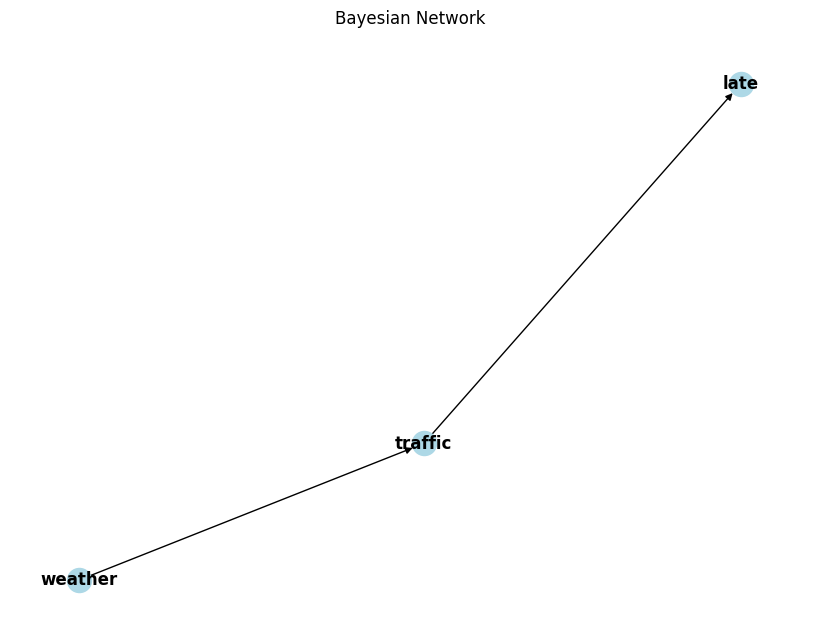

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

nx_graph = nx.DiGraph(model.edges())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', font_color='black', font_weight='bold')
plt.title('Bayesian Network')
plt.show()